In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
PROJECT_DIR = "/home/alexandre/workspace/larva-bodies/"

In [21]:
R = np.array([[1, 0,  0],
            [0, 0, -1],
            [0, 1,  0]])
asset_dir = f'{PROJECT_DIR}/assets/meshes/corrected_cable_muscle_meshes/npy'
files = [s for s in os.listdir(asset_dir) if s.startswith('cable')]
muscles = {}
for filename in files:
    index = int(filename.split('.')[0].split('_')[-1])
    name = 'muscle_'+str(index)
    meshfile = 'simplified_'+filename[5:-4]+'.obj'

    cables = [np.load(os.path.join(asset_dir, filename))@R.transpose()]
    if np.isnan(cables[0]).any():
        continue
    muscles[index] = next(iter(cables))
print(muscles.keys())


dict_keys([316, 518, 910, 561, 320, 353, 869, 55, 616, 508, 709, 827, 979, 653, 402, 553, 854, 468, 156, 710, 970, 260, 501, 757, 329, 752, 624, 917, 522, 379, 112, 511, 364, 162, 1072, 157, 37, 212, 424, 430, 274, 65, 610, 756, 34, 615, 113, 852, 426, 876, 51, 662, 256, 467, 775, 301, 663, 167, 922, 605, 920, 612, 780, 664, 864, 879, 479, 513, 930, 672, 665, 453, 965, 660, 606, 861, 173, 360, 429, 652, 411, 557, 765, 58, 221, 570, 715, 923, 563, 1071, 378, 253, 626, 961, 878, 457, 420, 862, 1016, 371, 153, 217, 273, 262, 363, 115, 925, 1029, 502, 306, 657, 263, 565, 824, 304, 367, 814, 414, 252, 366, 966, 1076, 259, 172, 851, 12, 206, 380, 980, 860, 558, 7, 769, 272, 412, 656, 528, 419, 873, 277, 407, 425, 213, 603, 530, 620, 959, 41, 480, 224, 764, 417, 130, 1030, 806, 908, 1013, 968, 504, 760, 815, 512, 1020, 702, 1064, 807, 258, 460, 203, 880, 629, 323, 713, 123, 15, 551, 874, 91, 978, 1079, 915, 573, 927, 510, 962, 40, 974, 416, 877, 1080, 911, 717, 308, 562, 856, 93, 771, 928, 55

In [22]:
muscle_lengths = {i:np.sum(np.linalg.norm(np.diff(cable, axis=0), axis=1)) for i, cable in muscles.items()}

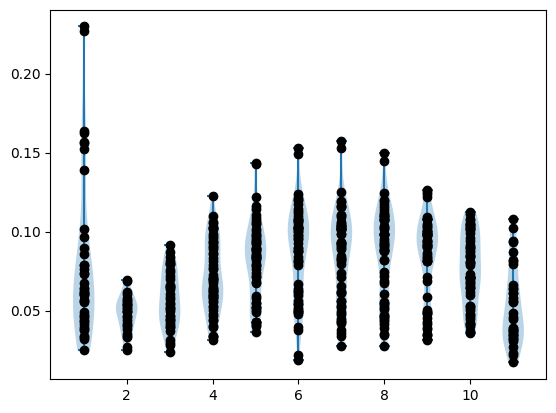

In [23]:
segment_wise = [[v for i, v in muscle_lengths.items() if i>=k*100 and i < (k+1)*100] for k in range(11)]
plt.violinplot(segment_wise)
for i, l in enumerate(segment_wise):
    plt.plot([i+1 for _ in l], l, 'ok')
plt.show()

In [24]:
print(sorted([(i-400)%50 for i in muscles if i>=400 and i<450]))

print(sorted([i%50 for i in muscles if i>=0 and i<100]))
print(sorted([(i-100)%50 for i in muscles if i>=100 and i<200]))
print(sorted([(i-200)%50 for i in muscles if i>=200 and i<300]))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 7, 7, 8, 8, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 25, 25, 34, 34, 37, 37, 38, 38, 40, 40, 41, 41, 43, 43, 47, 47]
[3, 3, 6, 6, 7, 7, 8, 8, 12, 12, 13, 13, 15, 15, 17, 17, 21, 21, 22, 22, 23, 23, 25, 25, 30, 30, 31, 31]
[1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 10, 11, 11, 12, 12, 13, 13, 17, 17, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 26, 26, 27, 27]


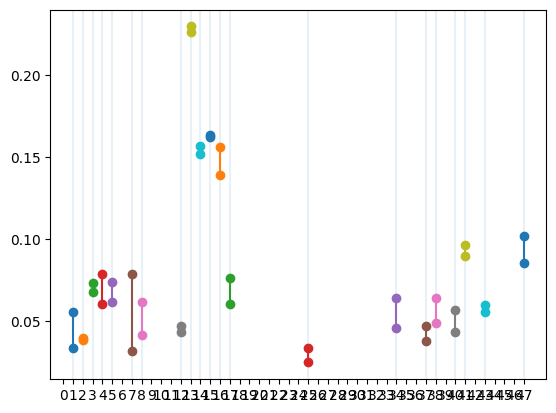

In [25]:
tmp = sorted([(i%50,l) for i,l in muscle_lengths.items() if i>=0 and i<100], key=lambda t:t[0])
i = [i for i,_ in tmp]
l = [l for _,l in tmp]

for k in range(1, len(i),2):
    plt.axvline(i[k],0,1,alpha=0.1)
    plt.plot([i[k-1], i[k]], [l[k-1], l[k]], 'o-')
plt.xticks(range(48))
plt.show()


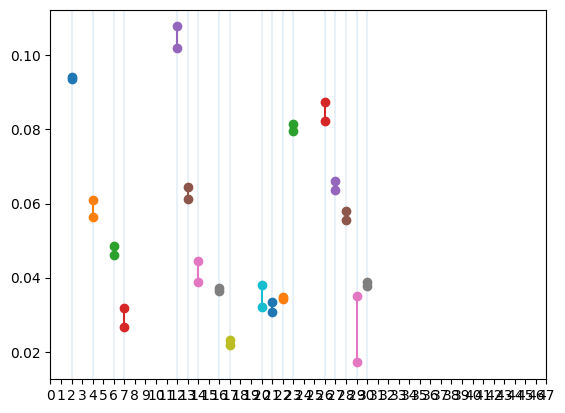

In [26]:
tmp = sorted([(i%50,l) for i,l in muscle_lengths.items() if i>=1000], key=lambda t:t[0])
i = [i for i,_ in tmp]
l = [l for _,l in tmp]

for k in range(1, len(i),2):
    plt.axvline(i[k],0,1,alpha=0.1)
    plt.plot([i[k-1], i[k]], [l[k-1], l[k]], 'o-')
plt.xticks(range(48))
plt.show()